In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
rcParams['figure.figsize'] = (12,5)
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

In [4]:
df = pd.read_csv('C:/Ramlan/Rakamin Bootcamp/Final Project/train.csv')

In [5]:
# data type formatting
df['Driving_License'] = df['Driving_License'].astype(str)
df['Region_Code'] = df['Region_Code'].astype(str)
df['Previously_Insured'] = df['Previously_Insured'].astype(str)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(str)
df['Response'] = df['Response'].astype(str)

In [6]:
# Membagi dataset menjadi numericals dan categories
nums = ['Age', 'Annual_Premium', 'Vintage']
cats = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

## Visualisasi Data Numerik

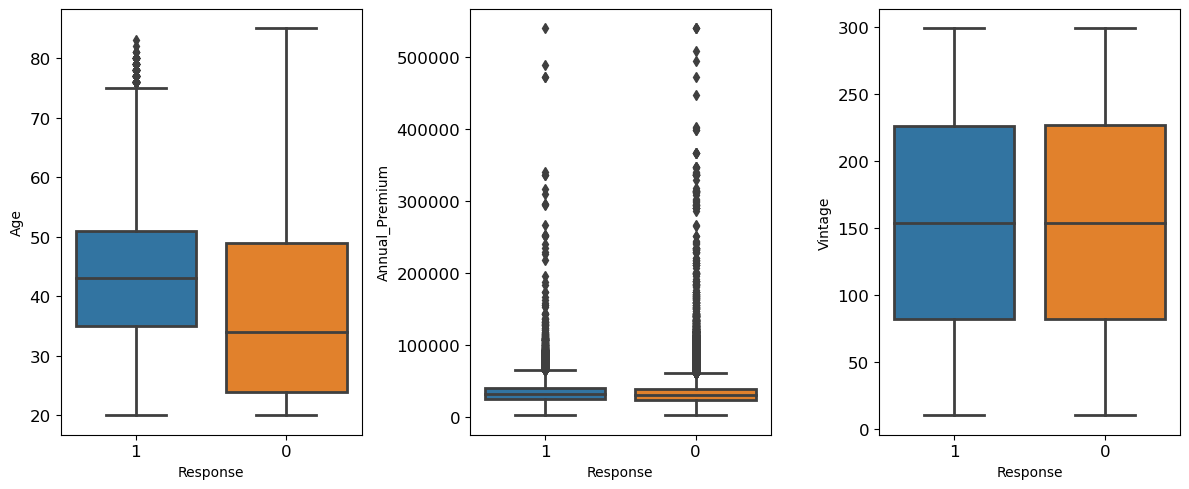

In [7]:
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[nums[i]], x=df['Response'])
    plt.tight_layout()


In [8]:
# kuartil 1 dan 3 Age
age_q1_1 = df[df['Response']=='1']['Age'].quantile(0.25)
age_q1_0 = df[df['Response']=='0']['Age'].quantile(0.25)

age_q3_1 = df[df['Response']=='1']['Age'].quantile(0.75)
age_q3_0 = df[df['Response']=='0']['Age'].quantile(0.75) 

# kuartil 1 dan 3 dari annual premium
annual_q1 = df['Annual_Premium'].quantile(0.25)
annual_q3 = df['Annual_Premium'].quantile(0.75)

# kuartil 1 dan 3 dari vintage
vintage_q1 = df['Vintage'].quantile(0.25)
vintage_q3 = df['Vintage'].quantile(0.75)

print(f'kuartil 1 umur untuk response 1 = {age_q1_1}')
print(f'kuartil 3 umur untuk response 1 = {age_q3_1}')
print(f'kuartil 1 umur untuk response 0 = {age_q1_0}')
print(f'kuartil 3 umur untuk response 0 = {age_q3_0}\n')

print(f'kuartil 1 Annual Premium = {annual_q1}')
print(f'kuartil 3 Annual Premium = {annual_q3}\n')

print(f'kuartil 1 Vintage = {vintage_q1}')
print(f'kuartil 3 Vintage = {vintage_q3}')

kuartil 1 umur untuk response 1 = 35.0
kuartil 3 umur untuk response 1 = 51.0
kuartil 1 umur untuk response 0 = 24.0
kuartil 3 umur untuk response 0 = 49.0

kuartil 1 Annual Premium = 24405.0
kuartil 3 Annual Premium = 39400.0

kuartil 1 Vintage = 82.0
kuartil 3 Vintage = 227.0


Interpretasi:
- Distribusi data untuk kategori umur antara customer yang tertarik dengan asuransi kendaraan dan yang tidak tertarik pada dasarnya tidak jauh berbeda. Hanya saja untuk customer yang tertarik, sebaran datanya cenderung lebih terpusat pada rentang umur yang **lebih matang**, yaitu antara **35-51 tahun**. Sedangkan untuk customer yang tidak tertarik, umurnya **lebih bervariatif**, yaitu antara **24-49 tahun**.
- Sebagian besar customer, baik yang tertarik dengan asuransi kendaraan ataupun yang tidak, memiliki Premi Tahunan yang cukup rendah, yaitu  antara **Rs 24.405** hingga **39.400**

## Visualisasi Data Kategorik

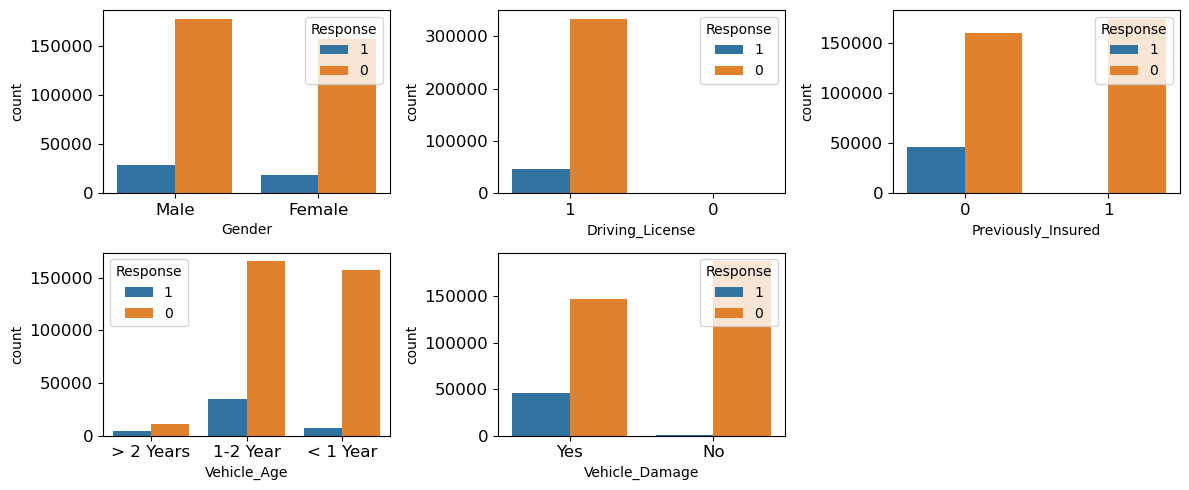

In [9]:

cats_filtered = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

for i in range(0, len(cats_filtered)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cats_filtered[i]], hue=df['Response'])
    plt.tight_layout()


In [50]:
# Persentase customer yang tertarik dan belum memiliki asuransi kendaraan
df_interested = df[df['Response']=='1'] # dataset yang tertarik
interested_insured_0 = df_interested[df_interested['Previously_Insured']=='0']['id'].count()
total_insured_0 = df[df['Previously_Insured']=='0']['id'].count()
previously_insured_percentage = round(interested_insured_0 / total_insured_0, 2) * 100
previously_insured_percentage

23.0

Insight:
- Customer di dominasi oleh **laki-laki**, baik yang tertarik ataupun yang tidak.
- Seluruh customer memiliki **Driving License**
- Seluruh customer yang tertarik dengan asuransi kendaraan adalah customer yang belum memiliki asuransi kendaraan sebelumnya. Namun jumlah tersebut hanya **23%** dari total customer yang belum memiliki asuransi kendaraan.
- Kelompok Customer yang memiliki kendaraan dengan **umur 1 - 2 tahun** adalah kelompok customer terbanyak.
- Jumlah Customer yang tidak pernah mengalami kecelakaan melebih jumlah customer yang pernah mengalami kecelakaan. Dan hampir seluruh customer yang tertarik dengan asuransi kendaraan adalah customer yang pernah mengalami kecelakaan.

## Region Code and Policy Sales Channel

In [10]:
# total customer berdasarkan region code dan response
region_response = df.groupby(['Region_Code', 'Response'])['id'].count().reset_index()

# total customer yang tertarik berdasarkan region
interested_by_region = region_response[region_response['Response']=='1']
interested_by_region.columns = ['Region_Code', 'Response', 'Total_Interested_Customers']

# total customer berdasarkan region
total_by_region = df.groupby('Region_Code')['id'].count().reset_index()
total_by_region.columns = ['Region_Code', 'Total_Customers']

# merge 
merge_region = interested_by_region.merge(total_by_region, on='Region_Code', how='inner')
merge_region['Percentage'] = round(merge_region['Total_Interested_Customers'] / merge_region['Total_Customers'], 3) * 100

In [11]:
# diurutkan berdasarkan Total_Interested_Customers
merge_region1 = merge_region.sort_values(by='Total_Interested_Customers', ascending=False).reset_index()
merge_region1 = merge_region1.set_index('Region_Code')
# # diurutkan berdasarkan Percentage
merge_region2 = merge_region.sort_values(by='Percentage', ascending=False).reset_index()
merge_region2 = merge_region2.set_index('Region_Code')

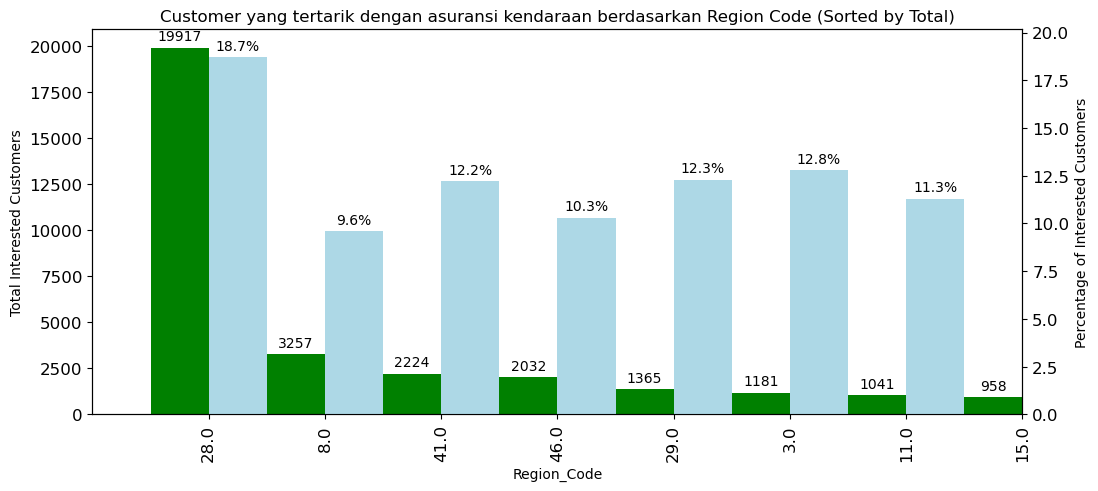

In [30]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)  # create matplotlib axes
ax2 = ax.twinx()  # create another axes that shares the same x-axis

bars1 = merge_region1.Total_Interested_Customers.plot(kind='bar', color='green', ax=ax, position=1, label='Total Interested Customers')
bars2 = merge_region1.Percentage.plot(kind='bar', color='lightblue', ax=ax2, position=0, label='Percentage of Interested Customers')

ax.set_ylabel('Total Interested Customers')
ax2.set_ylabel('Percentage of Interested Customers')

ax.set_xlim(-1, 7)

# Menambahkan label data pada masing-masing bar pada plot pertama (Total Interested Customers)
for bar in bars1.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Menambahkan label data pada masing-masing bar pada plot kedua (Percentage of Interested Customers) dan round to 1 decimal place
for bar in bars2.patches:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Customer yang tertarik dengan asuransi kendaraan berdasarkan Region Code (Sorted by Total)')
plt.show()

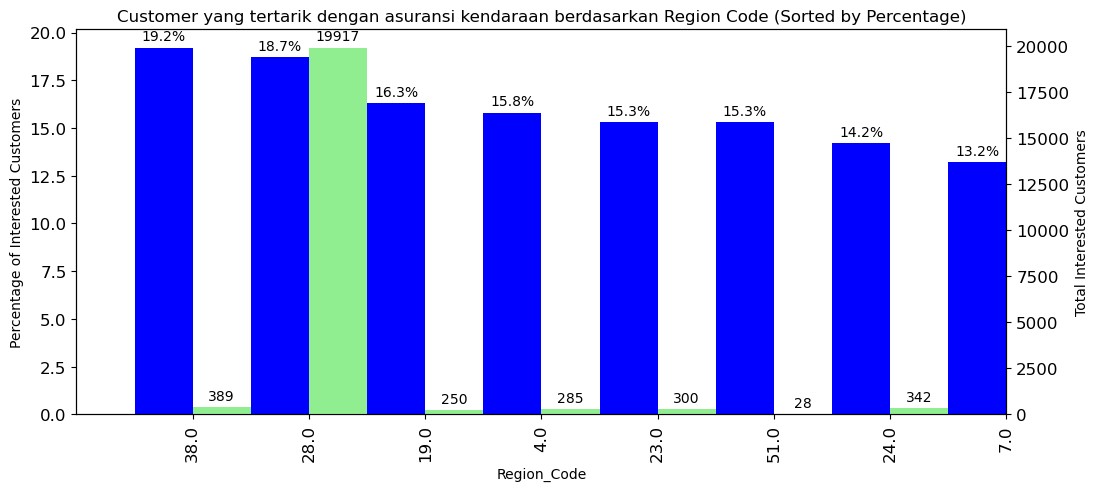

In [29]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)  # create matplotlib axes
ax2 = ax.twinx()  # create another axes that shares the same x-axis

bars1 = merge_region2.Percentage.plot(kind='bar', color='blue', ax=ax, position=1, label='Percentage of Interested Customers')
bars2 = merge_region2.Total_Interested_Customers.plot(kind='bar', color='lightgreen', ax=ax2, position=0, label='Total Interested Customers')

ax.set_ylabel('Percentage of Interested Customers')
ax2.set_ylabel('Total Interested Customers')

ax.set_xlim(-1, 7)

for bar in bars1.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for bar in bars2.patches:
    height = bar.get_height()
    ax2.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Customer yang tertarik dengan asuransi kendaraan berdasarkan Region Code (Sorted by Percentage)')
plt.show()

Berdasarkan kedua visualisasi di atas, dapat disimpulkan bahwa sebagian besar customers yang tertarik dengan asuransi kendaraan berasal dari **Region Code 28**, yaitu sebanyak **19.917** customers, atau **18.7%** dari total customers yang tinggal di Region tersebut. 

Dari segi proporsi, Region Code 38 adalah yang tertinggi, yaitu sebesar 19,2%. Namun jumlah customer yang tertarik sangat sedikit. Hal tersebut dikarenakan total customer di Region tersebut jauh lebih sedikit dibanding total customer di Region Code 28.

In [16]:
# total customer berdasarkan policy sales channel dan response
channel_response = df.groupby(['Policy_Sales_Channel', 'Response'])['id'].count().reset_index()

# total customer yang tertarik berdasarkan channel
interested_by_channel = channel_response[channel_response['Response']=='1']
interested_by_channel.columns = ['Policy_Sales_Channel', 'Response', 'Total_Interested_Customers']

# total customer berdasarkan channel
total_by_channel = df.groupby('Policy_Sales_Channel')['id'].count().reset_index()
total_by_channel.columns = ['Policy_Sales_Channel', 'Total_Customers']

# merge 
merge_channel = interested_by_channel.merge(total_by_channel, on='Policy_Sales_Channel', how='inner')
merge_channel['Percentage'] = round(merge_channel['Total_Interested_Customers'] / merge_channel['Total_Customers'], 3) * 100

In [41]:
# diurutkan berdasarkan Total_Interested_Customers
merge_channel1 = merge_channel.sort_values(by='Total_Interested_Customers', ascending=False).reset_index()
merge_channel1 = merge_channel1.set_index('Policy_Sales_Channel')
# # diurutkan berdasarkan Percentage
merge_channel2 = merge_channel1.head(7).sort_values(by='Percentage', ascending=False).reset_index()
merge_channel2 = merge_channel2.set_index('Policy_Sales_Channel')

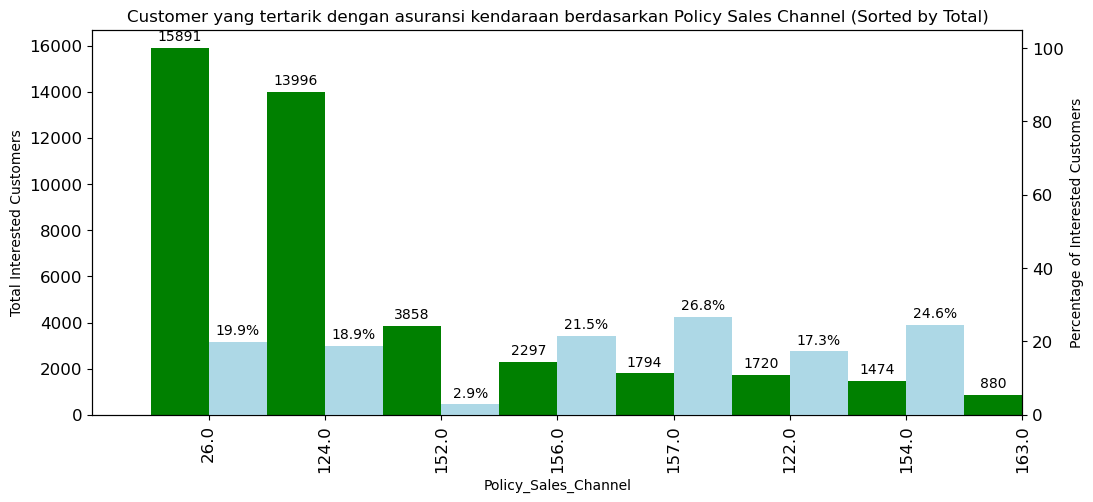

In [27]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)  # create matplotlib axes
ax2 = ax.twinx()  # create another axes that shares the same x-axis

bars1 = merge_channel1.Total_Interested_Customers.plot(kind='bar', color='green', ax=ax, position=1, label='Total Interested Customers')
bars2 = merge_channel1.Percentage.plot(kind='bar', color='lightblue', ax=ax2, position=0, label='Percentage of Interested Customers')

ax.set_ylabel('Total Interested Customers')
ax2.set_ylabel('Percentage of Interested Customers')

ax.set_xlim(-1, 7)

# Menambahkan label data pada masing-masing bar pada plot pertama (Total Interested Customers)
for bar in bars1.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Menambahkan label data pada masing-masing bar pada plot kedua (Percentage of Interested Customers) dan round to 1 decimal place
for bar in bars2.patches:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Customer yang tertarik dengan asuransi kendaraan berdasarkan Policy Sales Channel (Sorted by Total)')
plt.show()

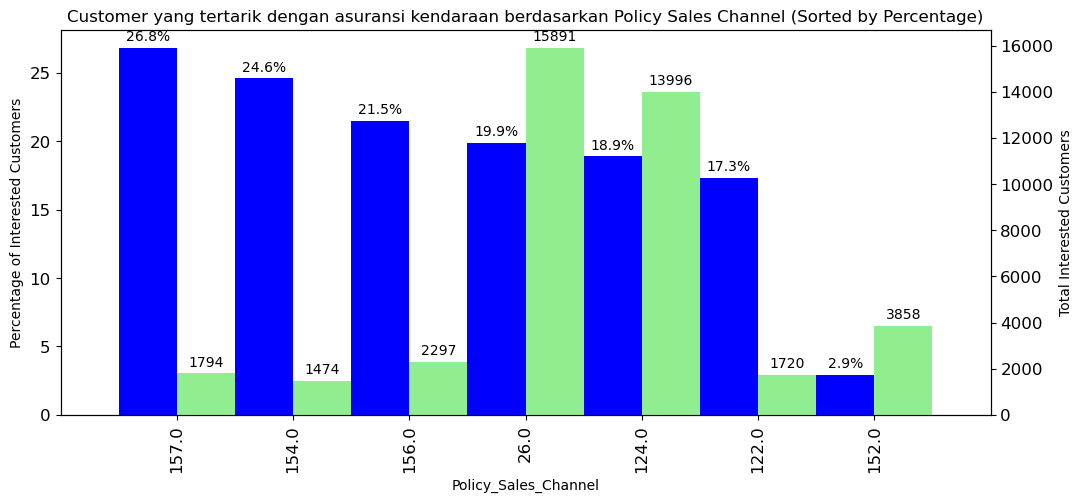

In [42]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)  # create matplotlib axes
ax2 = ax.twinx()  # create another axes that shares the same x-axis

bars1 = merge_channel2.Percentage.plot(kind='bar', color='blue', ax=ax, position=1, label='Percentage of Interested Customers')
bars2 = merge_channel2.Total_Interested_Customers.plot(kind='bar', color='lightgreen', ax=ax2, position=0, label='Total Interested Customers')

ax.set_ylabel('Percentage of Interested Customers')
ax2.set_ylabel('Total Interested Customers')

ax.set_xlim(-1, 7)

for bar in bars1.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for bar in bars2.patches:
    height = bar.get_height()
    ax2.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Customer yang tertarik dengan asuransi kendaraan berdasarkan Policy Sales Channel (Sorted by Percentage)')
plt.show()

Berdasarkan kedua visualisasi di atas dapat disimpulkan bahwa Policy Sales Channel yang memperoleh customer asuransi kendaraan terbanyak adalah **Channel 26**, yaitu sekitar **16.000 customers**, atau 19,9% dari total customer yang ditawarkan melalui Channel tersebut.

Namun dari segi proporsi, **Channel 157** memiliki tingkat konversi yang paling tinggi, yaitu sebesar **26,8%**; disusul Channel 154 dan 156, dengan tingkat konversi masing-masing sebesar 24,6% dan 21,5%